In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np

print(tf.__version__)

2.11.0


In [29]:
try:
  loaded_data = np.loadtxt('/content/drive/MyDrive/Git/tensorflow2-colab-ex/resources/csv/diabetes.csv', delimiter=',')

  x_data = loaded_data[:, 0:-1]
  t_data = loaded_data[:, [-1]]

  print("x_data.shape: ", x_data.shape)
  print("t_data.shape: ", t_data.shape)

except Exception as err:
  print(str(err))

x_data.shape:  (759, 8)
t_data.shape:  (759, 1)


In [30]:
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],), activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [31]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 1s - loss: 0.6828 - accuracy: 0.5865 - val_loss: 0.6798 - val_accuracy: 0.6118 - 687ms/epoch - 36ms/step
Epoch 2/500
19/19 - 0s - loss: 0.6773 - accuracy: 0.5997 - val_loss: 0.6753 - val_accuracy: 0.5987 - 63ms/epoch - 3ms/step
Epoch 3/500
19/19 - 0s - loss: 0.6724 - accuracy: 0.6161 - val_loss: 0.6713 - val_accuracy: 0.5921 - 78ms/epoch - 4ms/step
Epoch 4/500
19/19 - 0s - loss: 0.6682 - accuracy: 0.6178 - val_loss: 0.6679 - val_accuracy: 0.5921 - 74ms/epoch - 4ms/step
Epoch 5/500
19/19 - 0s - loss: 0.6644 - accuracy: 0.6260 - val_loss: 0.6648 - val_accuracy: 0.6053 - 78ms/epoch - 4ms/step
Epoch 6/500
19/19 - 0s - loss: 0.6610 - accuracy: 0.6293 - val_loss: 0.6620 - val_accuracy: 0.6118 - 61ms/epoch - 3ms/step
Epoch 7/500
19/19 - 0s - loss: 0.6577 - accuracy: 0.6310 - val_loss: 0.6594 - val_accuracy: 0.6118 - 69ms/epoch - 4ms/step
Epoch 8/500
19/19 - 0s - loss: 0.6549 - accuracy: 0.6359 - val_loss: 0.6571 - val_accuracy: 0.6250 - 83ms/epoch - 4ms/step
Epoch 9/500
19

In [32]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7655


[0.4805420935153961, 0.7654808759689331]

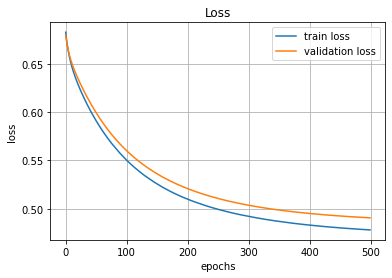

In [33]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

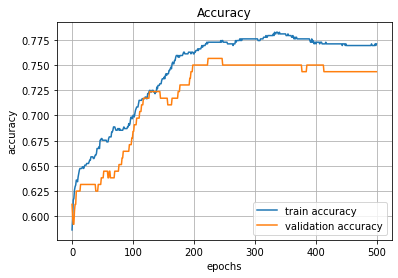

In [34]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()